In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
pip install pyod

In [0]:
pip install xgboost

In [0]:
pip install feature_selector

In [0]:
pip install nose

In [0]:
import pandas as pd
import numpy as np
import pyod
import seaborn as sns
import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn import preprocessing
from pyod.utils.data import evaluate_print

from pyod.models.pca import PCA
from pyod.models.mcd import MCD
from pyod.models.ocsvm import OCSVM

from pyod.models.lof import LOF 
from pyod.models.cof import COF
from pyod.models.cblof import CBLOF
from pyod.models.loci import LOCI
from pyod.models.hbos import HBOS
from pyod.models.knn import KNN
from pyod.models.sod import SOD

from pyod.models.abod import ABOD
from pyod.models.sos import SOS

from pyod.models.iforest import IForest
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.lscp import LSCP

from pyod.models.auto_encoder import AutoEncoder
from pyod.models.so_gaal import SO_GAAL
from pyod.models.mo_gaal import MO_GAAL

from sklearn.preprocessing import StandardScaler
from feature_selector import FeatureSelector

from datetime import datetime
np.set_printoptions(precision=3)

Using TensorFlow backend.


In [0]:
training_set = pd.read_csv('/content/drive/My Drive/Colab Notebooks/training_set_100k.csv',sep=',',header=0)
testing_set = pd.read_csv('/content/drive/My Drive/Colab Notebooks/test_set_inbalanced_60k.csv',sep=",",header=0)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
#transforma dados categóricos em números
for f in training_set.columns: 
    if training_set[f].dtype=='object': 
        label = preprocessing.LabelEncoder() 
        label.fit(list(training_set[f].values)) 
        training_set[f] = label.transform(list(training_set[f].values))
    
trainingSet = training_set.values
#np.random.shuffle(trainingSet)

trainingSet = trainingSet.astype(float)

for i in range (trainingSet.shape[0]-1, 0, -1):
    for j in range(0, trainingSet.shape[1]):
        trainingSet[i, j] = float(trainingSet[i, j])
        if (np.isinf(trainingSet[i, j]) or np.isnan(trainingSet[i, j])):
            trainingSet = np.delete(trainingSet, i, axis=0)

y_training = trainingSet[:, 84].astype(int)


trainingSet = np.delete(trainingSet, 84, axis=1)  #deleta o label

In [0]:
#transforma dados categóricos em números
for f in testing_set.columns: 
    if testing_set[f].dtype=='object': 
        label = preprocessing.LabelEncoder() 
        label.fit(list(testing_set[f].values)) 
        testing_set[f] = label.transform(list(testing_set[f].values))
    
testingSet = testing_set.values
#np.random.shuffle(testingSet)

testingSet = testingSet.astype(float)

for i in range (testingSet.shape[0]-1, 0, -1):
    for j in range(0, testingSet.shape[1]):
        testingSet[i, j] = float(testingSet[i, j])
        if (np.isinf(testingSet[i, j]) or np.isnan(testingSet[i, j])):
            testingSet = np.delete(testingSet, i, axis=0)

y_testing = testingSet[:, 84].astype(int)

testingSet = np.delete(testingSet, 84, axis=1)  #deleta o label

In [0]:
#Features codificadas pelo label enconder: 17 16 7 4 2 1 0
#Feaatures sempre 0: 67, 66, 65, 64, 63, 62, 40, 39
#features com correlação próxima de zero, vide loop abaixo: 73, 71, 70, 50, 42, 34, 12, 10 

droppingList = [67, 66, 65, 64, 63, 62, 40, 39]
droppedFeatures = droppingList

#cm = testing_set[top_corr_features].corr().values
for i in (droppingList):
    testingSet = np.delete(testingSet, i, axis=1)
#    header = np.delete(header, i, axis=0)
    trainingSet = np.delete(trainingSet, i, axis=1) 
    
#    cm = np.delete(cm, i, axis = 0)
#    cm = np.delete(cm, i, axis = 1)

#tolerance = 0.4
#for i in range(cm.shape[0]-1, 0, -1):
#    if cm[cm.shape[0]-1, i] >= -tolerance and cm[cm.shape[0]-1, i] <= tolerance:
#        if i not in droppingList:
#            droppedFeatures.append(i)
#            testingSet = np.delete(testingSet, i, axis=1)
#            header = np.delete(header, i, axis=0)
print("Features dropadas: ")
print(droppedFeatures)


Features dropadas: 
[67, 66, 65, 64, 63, 62, 40, 39]


In [0]:
import matplotlib.pyplot as pyplot
from numpy import loadtxt

from xgboost import XGBClassifier
from xgboost import plot_importance
from xgboost import plot_tree

# use feature importance for feature selection
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

In [0]:
model_name = 'XGBOOST'
model = XGBClassifier()
model.fit(trainingSet, y_training)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [0]:
print(trainingSet)
print(y_training.sum())
print(testingSet)
print(y_testing.sum())

[[8.550e+02 8.254e+04 2.136e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 [9.400e+02 8.254e+04 2.136e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 [3.422e+03 8.249e+04 2.133e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [6.585e+06 3.316e+04 3.597e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 [1.185e+05 8.100e+04 2.124e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.275e+06 8.475e+03 1.092e+03 ... 0.000e+00 0.000e+00 0.000e+00]]
50483
[[2.627e+05 5.125e+04 3.422e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.221e+06 4.717e+04 1.463e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 [1.228e+06 5.255e+04 1.616e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [4.670e+06 1.820e+04 1.362e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 [3.435e+06 1.369e+04 1.247e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 [3.237e+06 3.190e+04 2.534e+03 ... 0.000e+00 0.000e+00 0.000e+00]]
10256


[1.319e-02 8.857e-01 1.094e-02 2.663e-03 2.480e-02 4.075e-04 0.000e+00
 2.326e-02 0.000e+00 1.287e-03 0.000e+00 2.489e-04 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 3.204e-05
 0.000e+00 0.000e+00 0.000e+00 7.146e-06 0.000e+00 2.738e-04 2.090e-02
 6.886e-06 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 5.989e-05 0.000e+00
 1.711e-04 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 2.214e-04 0.000e+00 0.000e+00 2.528e-04 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 1.037e-02 0.000e+00 5.180e-03 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]

Feature mais importante eh 1 = 0.8857298
Feature menos importante eh 6 = 0.0000000
[8.550e+02 9.400e+02 3.422e+03 ... 6.585e+06 1.185e+05 2.275e+06]


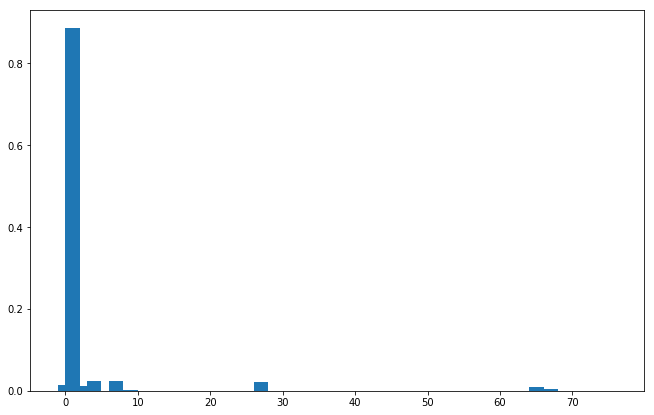

In [0]:
pyplot.rcParams['figure.figsize'] = (11,7)

# feature importance
print(model.feature_importances_)
print()
# feature mais importante
np.set_printoptions(precision=3)
print("Feature mais importante eh", np.argmax(model.feature_importances_), "=",max(model.feature_importances_))
print("Feature menos importante eh {} = {:.7f}".format(np.argmin(model.feature_importances_), min(model.feature_importances_)))
print(trainingSet[:,0])

# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_,width = 2)
pyplot.show()

In [0]:
# make predictions for test data and evaluate
y_pred = model.predict(testingSet)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 71.47%


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [0]:
# Fit model using each importance as a threshold
#thresholds = sort(model.feature_importances_)
#for thresh in thresholds:
	# select features using threshold
#	selection = SelectFromModel(model, threshold=thresh, prefit=True)
#	select_X_train = selection.transform(trainingSet)
 
	# train model
#	selection_model = XGBClassifier()
#	selection_model.fit(select_X_train, y_training)
 
	# eval model
#	select_X_test = selection.transform(testingSet)
#	y_pred = selection_model.predict(select_X_test)
#	predictions = [round(value) for value in y_pred]
#	accuracy = accuracy_score(y_test, predictions)
 
#	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

In [0]:
 outliers_fraction = 0.17
 def testMethod(clf, clf_name):
    # select features using threshold
    selection = SelectFromModel(model, threshold=0.002, prefit=True)
    select_X_test = selection.transform(testingSet)

    # train model
    start_fit = datetime.now()
    selection_model = clf
    selection_model.fit(select_X_test, y_training)
    
    # eval model

    y_pred = selection_model.predict(select_X_test)
    end_predict = datetime.now()

    #####################################################################

    print("\nResults - "+clf_name+":")
    truePositive = 0
    trueNegative = 0
    falsePositive = 0
    falseNegative = 0

    for i in range(y_test.size):
        if(y_test[i] == 1 and y_pred[i] == 1):
            truePositive = truePositive+1
        elif (y_test[i] == 0 and y_pred[i] == 0):
            trueNegative = trueNegative+1
        elif (y_test[i] == 0 and y_pred[i] == 1):
            falsePositive = falsePositive+1
        else:
            falseNegative = falseNegative+1

    print("Confusion Matrix:")
    print("               Actual")
    print("Predicted  ", truePositive, " | ", falsePositive)
    print("           ",falseNegative, " | ", trueNegative,"\n")
    
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print(clf_name)
    print()
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (0.002, select_X_test.shape[1], accuracy*100.0))
    print()
    
    #gets usual metrics based on results obtained
    total = y_test.shape[0]
    
    accuracy = (truePositive+trueNegative)/total
    print("Accuracy: ", accuracy)
    
    if(truePositive+falsePositive != 0):
        precision = truePositive/(truePositive+falsePositive)
        print("Precision: ", precision)
    else:
        precision = 0
        print("Precision: -")
        
    if(truePositive+falseNegative != 0):
        recall = truePositive/(truePositive+falseNegative)
        print("Recall: ", recall)
    else:
        recall = 0
        print("Recall: -")
        
    if(recall + precision != 0):
        f1 = 2*(recall*precision)/(recall+precision)
        print("F1-score: ", f1)
    else:
        print("F1-score: -")
    
    duration = end_predict - start_fit
    print("Duration: ", duration.total_seconds(), " seconds")
    print("\n")

    print("#####################################################################")
    print()

In [0]:
#Linear Models
classifiers = {
    'PCA': PCA(contamination= outliers_fraction),
    'MCD': MCD(contamination= outliers_fraction),
    'OCSVM': OCSVM(contamination= outliers_fraction)
}

for i, (clf_name, clf) in enumerate(classifiers.items()):
    testMethod(clf, clf_name)

/usr/local/lib/python3.6/dist-packages/pyod/models/base.py:344: UserWarning: y should not be presented in unsupervised learning.
  "y should not be presented in unsupervised learning.")



Results - PCA:
Confusion Matrix:
               Actual
Predicted   1968  |  8170
            8288  |  41207 

PCA

Thresh=0.002, n=36, Accuracy: 72.40%

Accuracy:  0.7240118726208643
Precision:  0.19412112842769777
Recall:  0.1918876755070203
F1-score:  0.19299794057075614
Duration:  0.417136  seconds


#####################################################################



/usr/local/lib/python3.6/dist-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (277.738266577269258 > 265.162685957262454)
  % (det, previous_det), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (264.728722517645508 > 245.553917273985377)
  % (det, previous_det), RuntimeWarning)



Results - MCD:
Confusion Matrix:
               Actual
Predicted   1109  |  9029
            9147  |  40348 

MCD

Thresh=0.002, n=36, Accuracy: 69.52%

Accuracy:  0.6952023208626096
Precision:  0.10939041231012034
Recall:  0.10813182527301092
F1-score:  0.10875747768951652
Duration:  21.447434  seconds


#####################################################################



In [0]:
#Proximity Based
classifiers = {
    #'COF': COF(contamination= outliers_fraction),  #Apresentou erros de execução.
    'LOF': LOF(contamination = outliers_fraction),
    'CBLOF':CBLOF(contamination= outliers_fraction),
    #'LOCI':LOCI(contamination= outliers_fraction),   #Travou a máquina de execução repetidas vezes.
    'HBOS': HBOS(contamination= outliers_fraction),
    'kNN': KNN(method='largest', contamination= outliers_fraction),
    'AvgKNN': KNN(method='mean', contamination= outliers_fraction),
    'MedKNN': KNN(method='median', contamination= outliers_fraction),
    'SOD': SOD(contamination= outliers_fraction)
}

for i, (clf_name, clf) in enumerate(classifiers.items()):
    testMethod(clf, clf_name)    

In [0]:
#Probabilistic tests
classifiers = {
    'ABOD': ABOD(contamination = outliers_fraction),
    #'SOS': SOS(contamination = outliers_fraction) #Apresentou erros de execução.
}

for i, (clf_name, clf) in enumerate(classifiers.items()):
    testMethod(clf, clf_name)

In [0]:
#Ensenbles tests
listDetectors = detector_list=[HBOS(),
                               PCA(),
                               ABOD(),
                               LOF(),
                               KNN()]
classifiers = {
    'Isolation Forest': IForest(contamination = outliers_fraction),
    'Feature Bagging': FeatureBagging(contamination = outliers_fraction)
    #'LSCP': LSCP(detector_list = listDetectors, contamination = outliers_fraction) #Still couldn't get it to work
    #XGBOD tests are in a separate file
}

for i, (clf_name, clf) in enumerate(classifiers.items()):
    testMethod(clf, clf_name)

In [0]:
#Neural Networks tests
classifiers = {
    'AutoEncoder': AutoEncoder(contamination = outliers_fraction, hidden_neurons = [8, 4, 4, 8], epochs = 15),
    'SO_GAAL': SO_GAAL(contamination = outliers_fraction),
    'MO_GAAL': MO_GAAL(contamination = outliers_fraction)
}

for i, (clf_name, clf) in enumerate(classifiers.items()):
    testMethod(clf, clf_name)